In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# jupyter noteインタラクティブモードをオンにする
%matplotlib widget


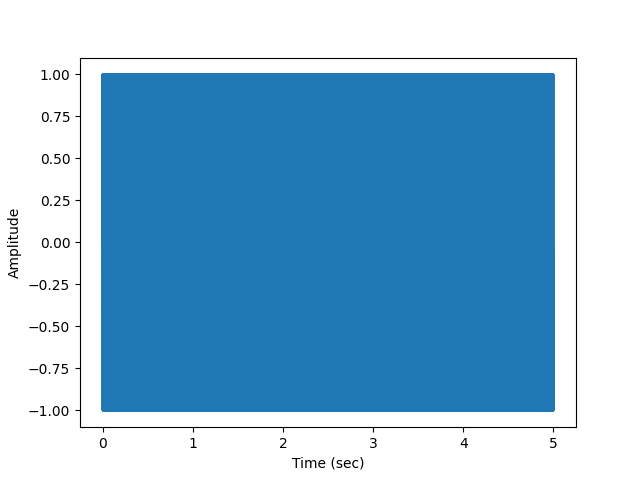

In [3]:
# サンプル音源の作成
fs = 44100
# 5秒間のサイン波を作成
t = np.arange(fs * 5) / fs
x = np.sin(2 * np.pi * 440 * t)

# プロット
plt.plot(t, x)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()


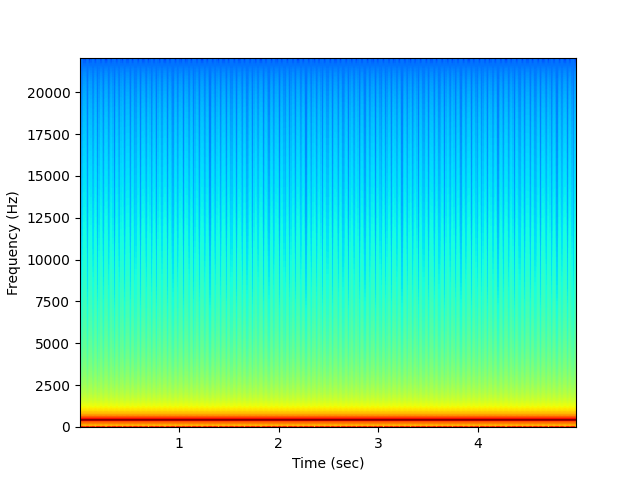

In [4]:
# スペクトログラムの計算
nperseg = 1024
noverlap = nperseg // 2
f, t, Sxx = signal.spectrogram(x, fs, window="hann", nperseg=nperseg, noverlap=noverlap)

# プロット
plt.figure()
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap="jet")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.show()


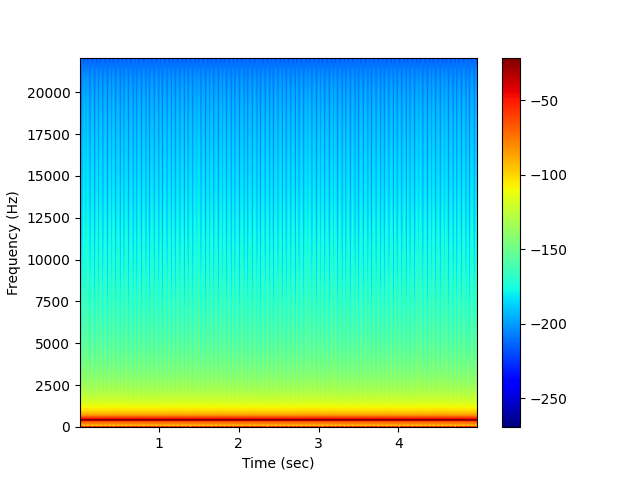

In [5]:
# プロット上の時間周波数範囲をドラッグ＆ドロップで指定
from matplotlib.widgets import RectangleSelector

# 範囲指定のコールバック関数宣言
def onselect(eclick, erelease):
    global t1, t2, f1, f2
    t1, t2 = eclick.xdata, erelease.xdata
    f1, f2 = eclick.ydata, erelease.ydata
    print("t1 = {:.3f}, t2 = {:.3f}, f1 = {:.3f}, f2 = {:.3f}".format(t1, t2, f1, f2))


# プロット上に矩形選択領域を表示する関数宣言
def draw_rectangle(event):
    global t1, t2, f1, f2
    if event.key == "r":
        ax = plt.gca()
        rs = RectangleSelector(ax, onselect, drawtype="box", useblit=True, button=[1], minspanx=5, minspany=5, spancoords="pixels", interactive=True)
        plt.connect("key_press_event", rs)
    
# スペクトログラムのプロット
plt.figure()
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap="jet")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()
# 範囲指定のコールバック関数を登録する
plt.connect("key_press_event", draw_rectangle)
plt.show()


In [6]:
np.log10(1E-6)

-6.0

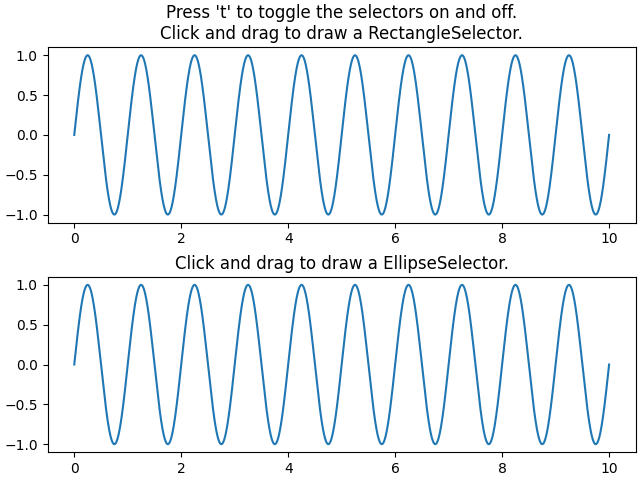

In [7]:
from matplotlib.widgets import EllipseSelector, RectangleSelector
import numpy as np
import matplotlib.pyplot as plt


def select_callback(eclick, erelease):
    """
    Callback for line selection.

    *eclick* and *erelease* are the press and release events.
    """
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print(f"({x1:3.2f}, {y1:3.2f}) --> ({x2:3.2f}, {y2:3.2f})")
    print(f"The buttons you used were: {eclick.button} {erelease.button}")


def toggle_selector(event):
    print('Key pressed.')
    if event.key == 't':
        for selector in selectors:
            name = type(selector).__name__
            if selector.active:
                print(f'{name} deactivated.')
                selector.set_active(False)
            else:
                print(f'{name} activated.')
                selector.set_active(True)


fig = plt.figure(layout='constrained')
axs = fig.subplots(2)

N = 100000  # If N is large one can see improvement by using blitting.
x = np.linspace(0, 10, N)

selectors = []
for ax, selector_class in zip(axs, [RectangleSelector, EllipseSelector]):
    ax.plot(x, np.sin(2*np.pi*x))  # plot something
    ax.set_title(f"Click and drag to draw a {selector_class.__name__}.")
    selectors.append(selector_class(
        ax, select_callback,
        useblit=True,
        button=[1, 3],  # disable middle button
        minspanx=5, minspany=5,
        spancoords='pixels',
        interactive=True))
    fig.canvas.mpl_connect('key_press_event', toggle_selector)
axs[0].set_title("Press 't' to toggle the selectors on and off.\n"
                 + axs[0].get_title())
plt.show()

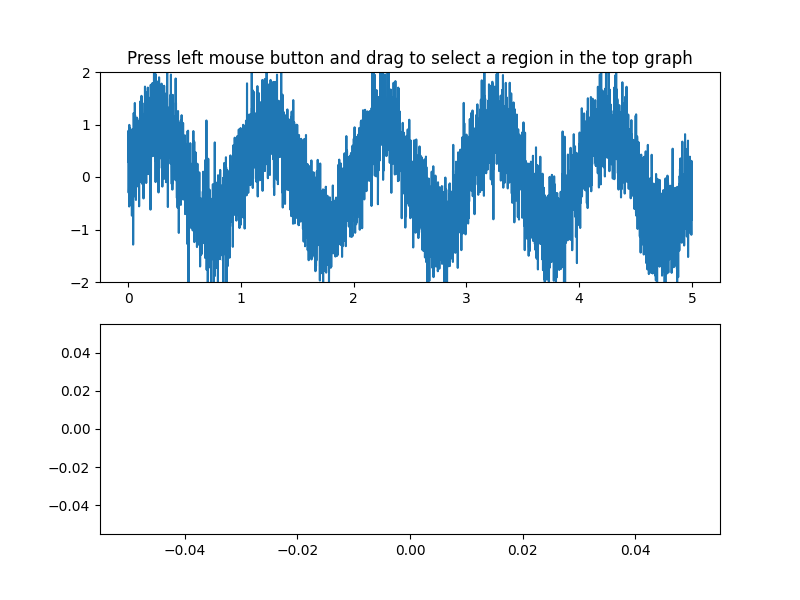

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

x = np.arange(0.0, 5.0, 0.001)
y = np.sin(2 * np.pi * x) + 0.5 * np.random.randn(len(x))

ax1.plot(x, y)
ax1.set_ylim(-2, 2)
ax1.set_title('Press left mouse button and drag '
              'to select a region in the top graph')

line2, = ax2.plot([], [])


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    region_x = x[indmin:indmax]
    region_y = y[indmin:indmax]

    if len(region_x) >= 2:
        line2.set_data(region_x, region_y)
        ax2.set_xlim(region_x[0], region_x[-1])
        ax2.set_ylim(region_y.min(), region_y.max())
        fig.canvas.draw_idle()


span = SpanSelector(
    ax1,
    onselect,
    "horizontal",
    useblit=True,
    props=dict(alpha=0.5, facecolor="tab:blue"),
    interactive=True,
    drag_from_anywhere=True
)
# Set useblit=True on most backends for enhanced performance.


plt.show()


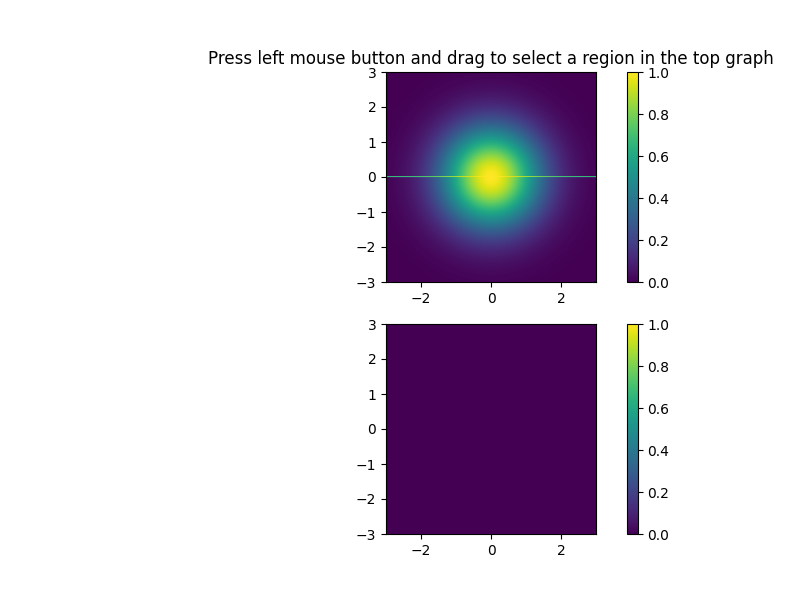

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = np.exp(-0.5 * (X**2 + Y**2))  # 2次元ガウス関数

Z[150,:] = 1

cmap1 = ax1.imshow(Z, extent=(-3, 3, -3, 3), origin='lower', vmin=0, vmax=1)
fig.colorbar(cmap1, ax=ax1) 
ax1.set_title('Press left mouse button and drag '
              'to select a region in the top graph')

cmap2 = ax2.imshow(np.zeros_like(Z), extent=(-3, 3, -3, 3), origin='lower', vmin=0, vmax=1)
fig.colorbar(cmap2, ax=ax2) 

def onselect(eclick, erelease):

    # 選択した範囲を行列Zのindexに変換
    xmin, xmax = sorted((eclick.xdata, erelease.xdata))
    ymin, ymax = sorted((eclick.ydata, erelease.ydata))
    
    indmin_x, indmax_x = np.searchsorted(x, (xmin, xmax))
    indmax_x = min(len(x) - 1, indmax_x)

    indmin_y, indmax_y = np.searchsorted(y, (ymin, ymax))
    indmax_y = min(len(y) - 1, indmax_y)

    region = Z[indmin_y:indmax_y, indmin_x:indmax_x]

    if region.shape[0] >= 2 and region.shape[1] >= 2:
        cmap2.set_data(region)
        # ax2.set_xlim(x[indmin_x], x[indmax_x])
        # ax2.set_ylim(y[indmin_y], y[indmax_y])
        fig.canvas.draw_idle()


span = RectangleSelector(
    ax1,
    onselect,
    # drawtype='box',
    useblit=True,
    button=[1, 3],  # disable middle button
    minspanx=5, minspany=5,
    spancoords='pixels',
    interactive=True
)

plt.show()


Button(description='Set to 0', style=ButtonStyle())

Output()

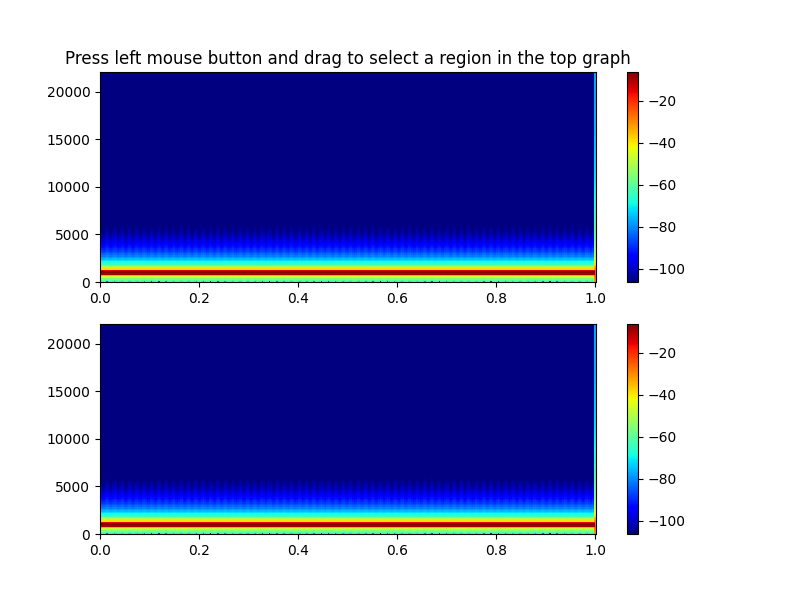

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector, EllipseSelector
from matplotlib.widgets import Cursor, Button
from IPython.display import display, Audio
import ipywidgets as widgets

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

# スペクトログラム用の信号を生成
fs= 44100  # サンプリング周波数
nperseg = 256  # 1回のFFTで計算するデータ数

stft_setting = {
    "nperseg": 256,  # 1回のFFTで計算するデータ数
    "noverlap": nperseg // 2,  # オーバーラップするデータ数
    "window": "hann",  # 窓関数
}

x = np.sin(2*np.pi*1000*np.linspace(0, 1, fs))
f, t, spec = signal.stft(x, fs, **stft_setting)
spec_mask = np.ones_like(spec)

complex2power = lambda x: 20*np.log10(np.abs(x))  # 対数スペクトログラムに変換

Sxx = complex2power(spec)  # 対数スペクトログラムに変換
vmax = np.max(Sxx)
vmin = vmax - 100

cmap1 = ax1.pcolormesh(t, f, Sxx, cmap='jet', vmin=vmin, vmax=vmax)
ax1.set_title('Press left mouse button and drag '
              'to select a region in the top graph')
cmap2 = ax2.pcolormesh(t, f, Sxx, cmap='jet', vmin=vmin, vmax=vmax)

fig.colorbar(cmap1, ax=ax1) 
fig.colorbar(cmap2, ax=ax2) 
ax1.set(xlim=(t[0], t[-1]), ylim=(f[0], f[-1]))
ax2.set(xlim=(t[0], t[-1]), ylim=(f[0], f[-1]))

def get_masked_spec():
    global spec, spec_mask
    return spec * spec_mask

def play_audio():
    global audio, audio_data, fs, ax2
    audio.clear_output(wait=True)

    _audio_data = np.copy(audio_data)

    xmin, xmax = sorted(ax2.get_xlim())
    indmin_x, indmax_x = int(xmin*fs), int(xmax*fs)
    indmax_x = min(audio_data.shape[-1], indmax_x)
    indmin_x = max(0, indmin_x)

    _audio_data = _audio_data[...,indmin_x:indmax_x]

    with audio:
        # フェードイン/フェードアウトを適用
        fade_len = int(fs * 0.01)  # フェードイン/フェードアウトの長さ
        fade_in = np.linspace(0, 1, fade_len)
        fade_out = np.linspace(1, 0, fade_len)
        _audio_data[:fade_len] *= fade_in
        _audio_data[-fade_len:] *= fade_out
        display(Audio(_audio_data, rate=fs))


def onselect(eclick, erelease):

    global audio, audio_data

    # 選択した範囲を行列Sxxのindexに変換
    xmin, xmax = sorted((eclick.xdata, erelease.xdata))
    ymin, ymax = sorted((eclick.ydata, erelease.ydata))

    indmin_x, indmax_x = np.searchsorted(t, (xmin, xmax))
    indmax_x = min(len(t) - 1, indmax_x)
    indmin_x = max(0, indmin_x)

    indmin_y, indmax_y = np.searchsorted(f, (ymin, ymax))
    indmin_y = max(0, indmin_y)
    indmax_y = min(len(f) - 1, indmax_y)

    Sxx = complex2power(get_masked_spec())
    region = np.zeros_like(Sxx)
    region[indmin_y:indmax_y+1, indmin_x:indmax_x+1] = Sxx[indmin_y:indmax_y+1, indmin_x:indmax_x+1]
    tmin, tmax = t[indmin_x], t[indmax_x]
    fmin, fmax = f[indmin_y], f[indmax_y]

    if region.shape[0] >= 2 and region.shape[1] >= 2:
        cmap2.set_array(region)
        ax2.set_xlim(tmin, tmax)
        ax2.set_ylim(fmin, fmax)
        fig.canvas.draw_idle()

        # 選択された範囲の音声を再生
        audio_data = signal.istft(get_masked_spec(), fs, **stft_setting)[1]
        play_audio()


def onselect_ellipse(eclick, erelease):
    pass

def on_button_clicked(button):
    global spec_mask
    global cmap2
    global fig
    global ax2
    global ellipse
    global audio_data

    # 選択範囲内のデータを0に書き換える
    indmin_x, indmax_x = np.searchsorted(t, (ellipse.extents[0], ellipse.extents[1]))
    indmax_x = min(len(t) - 1, indmax_x)
    indmin_x = max(0, indmin_x)

    indmin_y, indmax_y = np.searchsorted(f, (ellipse.extents[2], ellipse.extents[3]))
    indmin_y = max(0, indmin_y)
    indmax_y = min(len(f) - 1, indmax_y)

    y, x = np.ogrid[indmin_y:indmax_y+1, indmin_x:indmax_x+1]
    center_x = (indmax_x + indmin_x) / 2
    center_y = (indmax_y + indmin_y) / 2
    radius_x = (indmax_x - indmin_x) / 2
    radius_y = (indmax_y - indmin_y) / 2
    mask = ((x - center_x) / radius_x)**2 + ((y - center_y) / radius_y)**2 <= 1
    spec_mask[indmin_y:indmax_y+1, indmin_x:indmax_x+1][mask] *= 0.5

    Sxx = complex2power(get_masked_spec())
    cmap2.set_array(Sxx)
    cmap1.set_array(Sxx)
    
    audio_data = signal.istft(get_masked_spec(), fs, **stft_setting)[1]
    play_audio()
    fig.canvas.draw_idle()

span = RectangleSelector(
    ax1,
    onselect,
    # drawtype='box',
    useblit=True,
    interactive=True
)

ellipse = EllipseSelector(
    ax2,
    onselect_ellipse,
    useblit=True,
    interactive=True,
)

button = widgets.Button(description="Set to 0")
button.on_click(on_button_clicked)
display(button)

audio = widgets.Output()
audio_data = x
with audio:
    # フェードイン/フェードアウトを適用
    display(Audio(audio_data, rate=fs))
display(audio)
plt.show()